In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk import ngrams

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

In [40]:
# Load the data
data = pd.read_csv('./data/combined_reviews.csv', sep=';', encoding='utf-8')

data = data.drop('Unnamed: 0', axis=1)


In [41]:
reviews = data['review']

Metrics, using characters as length:

In [8]:
# Print the number of reviews
print(f"Number of reviews: {reviews.count()}")

# Print the average length of reviews
print(f"Average review length: {reviews.str.len().mean()}")

# Print the shortest review
print(f"Shortest review: {reviews.str.len().min()}")

# Print the longest review
print(f"Longest review: {reviews.str.len().max()}")

Number of reviews: 1787
Average review length: 333.6888640179071
Shortest review: 10
Longest review: 8890


Words as metric:

In [10]:
# Print the average number of words in reviews
print(f"Average review word count: {reviews.str.split().str.len().mean()}")

# Print the smallest number of words in reviews
print(f"Smallest review word count: {reviews.str.split().str.len().min()}")

# Print the largest number of words in reviews
print(f"Largest review word count: {reviews.str.split().str.len().max()}")

Average review word count: 59.833799664241745
Smallest review word count: 1
Largest review word count: 1612


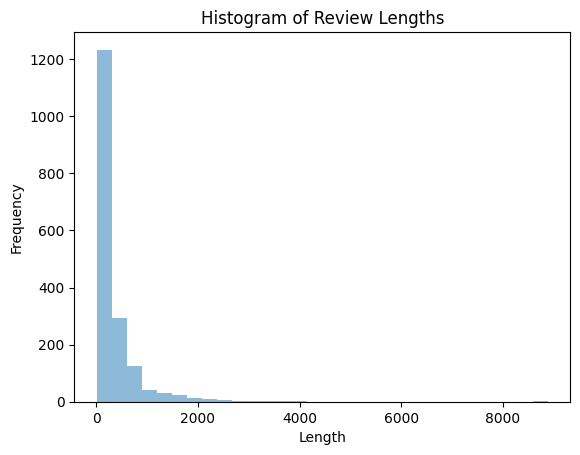

In [9]:

# Create a histogram of review lengths
plt.hist(reviews.str.len(), bins=30, alpha=0.5)
plt.title('Histogram of Review Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

Vocab before preprocessing:

Vocabulary size: 13846



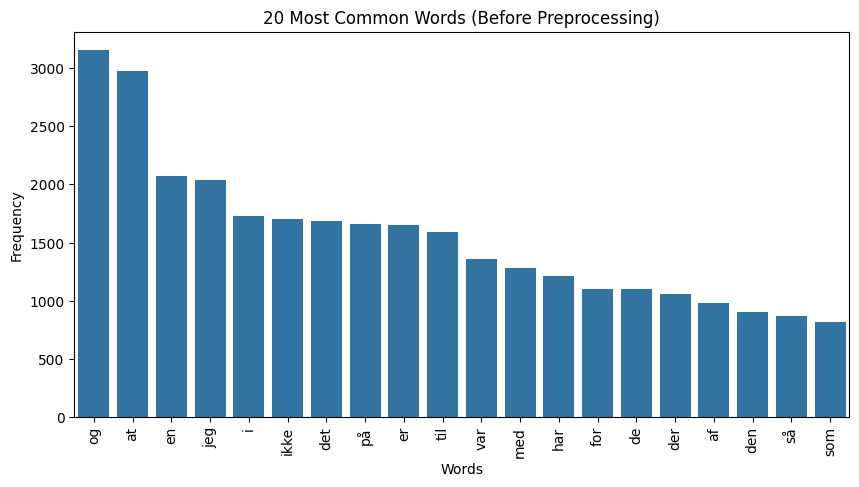

In [18]:
# Split the reviews into words
words_before_processing = reviews.str.split().sum()

# Create a Counter object
counter_before_processing = Counter(words_before_processing)

# Print the size of the vocabulary
print(f"Vocabulary size: {len(counter_before_processing)}\n")

# Get the 20 most common words
common_words_before = counter_before_processing.most_common(20)

# Print the 20 most common words
for word, count in common_words_before:
    print(f"{word}: {count}")

# Plot the distribution of the 20 most common words before preprocessing
words, counts = zip(*common_words_before)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title('20 Most Common Words (Before Preprocessing)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


Vocab after proprocessing:

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

så: 1054
bilen: 1011
servic: 935
bil: 859
god: 697
fik: 556
ved: 519
aunsbjerg: 506
kan: 475
gang: 340
få: 316
oplevels: 289
igen: 282
godt: 281
tid: 271
værksted: 269
lavet: 265
skorstensgaard: 260
værkstedet: 228
får: 211
Vocabulary size: 6803


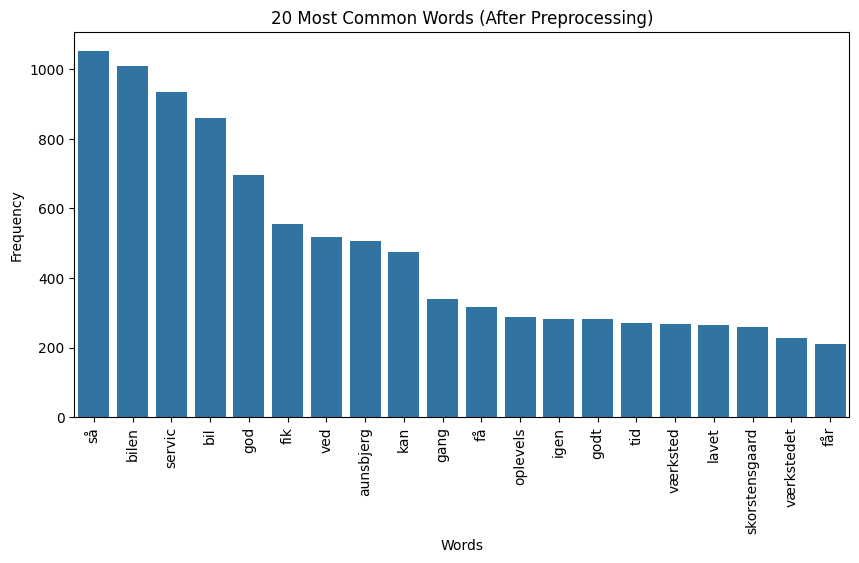

In [21]:
# Create a stemmer
stemmer = PorterStemmer()

# Get the list of stopwords
stop_words = set(stopwords.words('danish'))

# Tokenize, remove stopwords, and stem the words in the reviews
words_after_processing = []
for review in reviews:
    tokens = word_tokenize(review.lower())
    filtered_tokens = [stemmer.stem(token) for token in tokens if token.isalpha() and token not in stop_words]
    words_after_processing.extend(filtered_tokens)

# Create a Counter object
counter_after = Counter(words_after_processing)

# Get the 20 most common words
common_words_after = counter_after.most_common(20)

# Print the 20 most common words
for word, count in common_words_after:
    print(f"{word}: {count}")

# Print the size of the vocabulary
print(f"Vocabulary size: {len(counter_after)}")

words, counts = zip(*common_words_after)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title('20 Most Common Words (After Preprocessing)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

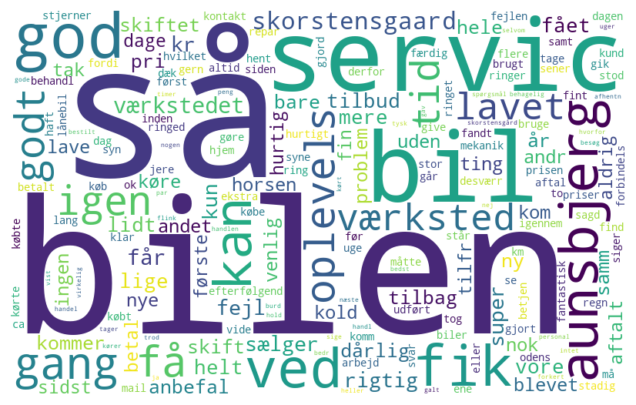

In [24]:

# Get the 100 most common words
common_words = counter_after.most_common(200)

# Create a word cloud
wordcloud = WordCloud(width=800, height=500, background_color='white').generate_from_frequencies(dict(common_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:

# Generate bigrams
bigrams = list(ngrams(words_after_processing, 2))
bigram_counts = Counter(bigrams)
common_bigrams = bigram_counts.most_common(5)

# Generate trigrams
trigrams = list(ngrams(words_after_processing, 3))
trigram_counts = Counter(trigrams)
common_trigrams = trigram_counts.most_common(5)

# Generate 4-grams
fourgrams = list(ngrams(words_after_processing, 4))
fourgram_counts = Counter(fourgrams)
common_fourgrams = fourgram_counts.most_common(5)

# Print the most common n-grams
print("Most common bigrams:", common_bigrams)
print("Most common trigrams:", common_trigrams)
print("Most common 4-grams:", common_fourgrams)

Most common bigrams: [(('god', 'servic'), 196), (('god', 'oplevels'), 105), (('aunsbjerg', 'horsen'), 79), (('rigtig', 'god'), 78), (('aunsbjerg', 'kold'), 58)]
Most common trigrams: [(('kan', 'varmt', 'anbefal'), 22), (('rigtig', 'god', 'servic'), 20), (('hele', 'vejen', 'igennem'), 19), (('kan', 'kun', 'anbefal'), 18), (('ved', 'aunsbjerg', 'horsen'), 15)]
Most common 4-grams: [(('servic', 'hele', 'vejen', 'igennem'), 6), (('kan', 'varmt', 'anbefal', 'aunsbjerg'), 6), (('fik', 'bilen', 'retur', 'km'), 5), (('bilen', 'retur', 'km', 'lyst'), 5), (('retur', 'km', 'lyst', 'motorlampen'), 5)]


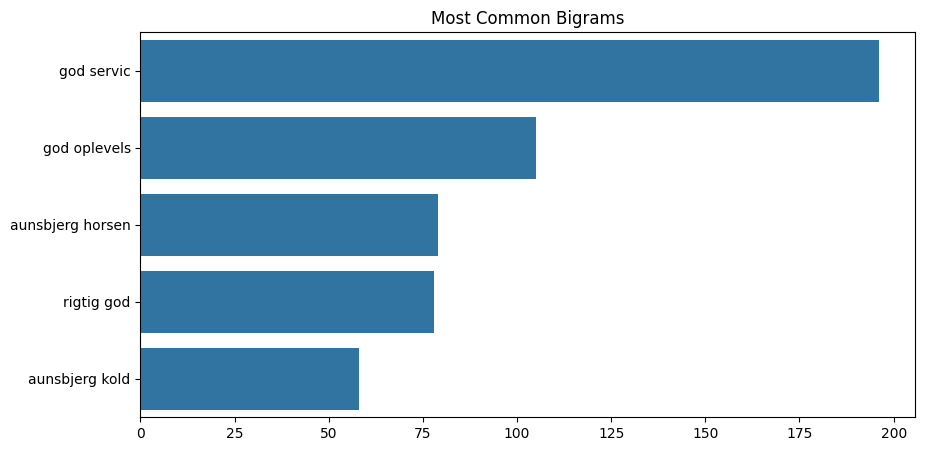

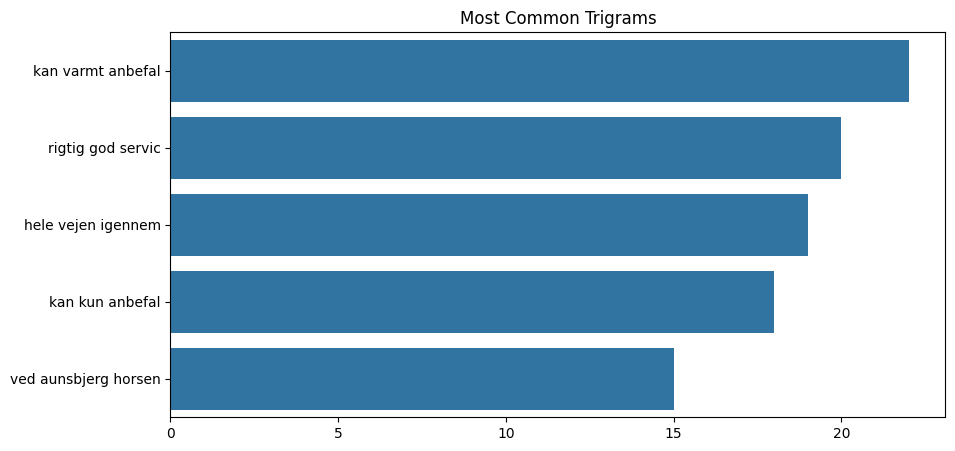

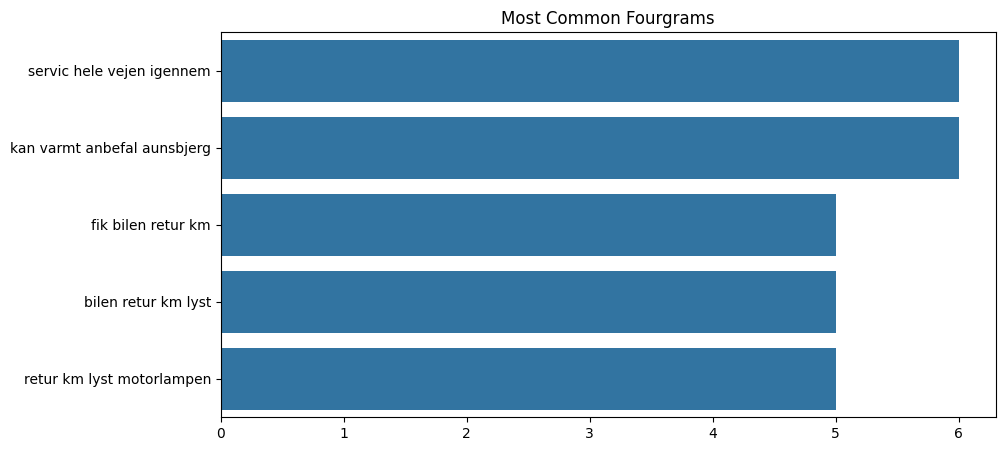

In [26]:
# Function to plot most common n-grams
def plot_most_common_ngrams(ngrams, title):
    ngrams, counts = zip(*ngrams)
    ngrams = [' '.join(gram) for gram in ngrams]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(ngrams))
    plt.title(title)
    plt.show()

# Plot the most common bigrams, trigrams, and fourgrams
plot_most_common_ngrams(common_bigrams, 'Most Common Bigrams')
plot_most_common_ngrams(common_trigrams, 'Most Common Trigrams')
plot_most_common_ngrams(common_fourgrams, 'Most Common Fourgrams')

NOW FOR TEXT GENERATION DATA:

In [72]:
text_gen_reviews_raw = data['review'][data['useful']==1]
replies_raw = data['reply'][data['useful']==1]

text_gen_reviews = text_gen_reviews_raw.reset_index(drop=True)
replies = replies_raw.reset_index(drop=True)


print(len(text_gen_reviews_raw))
print(len(replies_raw))
print(replies_raw[:5])

551
551
0    Hej Lars. Tak for din anmeldelse. Vi beklager ...
1    Hej V. H. Seemann. Tak for din anmeldelse Vi b...
2    Tak for en behagelig samtale i dag. Jeg vil ge...
3    Hej Timmy. Det er vi meget kede af! Vil I ikke...
4    Hej Jannik. Vi vil meget gerne drøfte sagen me...
Name: reply, dtype: object


In [76]:
# Print the number of reviews
print(f"Number of reviews: {text_gen_reviews.count()}")

# Print the average length of reviews
print(f"Average review length: {text_gen_reviews.str.len().mean()}")

# Print the shortest review
print(f"Shortest review: {text_gen_reviews.str.len().min()}")

# Print the longest review
print(f"Longest review: {text_gen_reviews.str.len().max()}")

# Print the number of replies
print("Now for the replies \n \n")
print(f"Number of replies: {replies.count()}")

# Print the average length of replies
print(f"Average reply length: {replies.str.len().mean()}")

# Print the shortest reply
print(f"Shortest reply: {replies.str.len().min()}")

# Print the longest reply
print(f"Longest reply: {replies.str.len().max()}")

Number of reviews: 551
Average review length: 239.9600725952813
Shortest review: 10
Longest review: 2361
Now for the replies 
 

Number of replies: 551
Average reply length: 267.20145190562613
Shortest reply: 59
Longest reply: 696


In [77]:
# Print the average number of words in reviews
print(f"Average review word count: {text_gen_reviews.str.split().str.len().mean()}")

# Print the smallest number of words in reviews
print(f"Smallest review word count: {text_gen_reviews.str.split().str.len().min()}")

# Print the largest number of words in reviews
print(f"Largest review word count: {text_gen_reviews.str.split().str.len().max()}")

print("Text generation \n \n")
# Print the average number of words in reviews
print(f"Average reply word count: {replies.str.split().str.len().mean()}")

# Print the smallest number of words in reviews
print(f"Smallest reply word count: {replies.str.split().str.len().min()}")

# Print the largest number of words in reviews
print(f"Largest reply word count: {replies.str.split().str.len().max()}")

Average review word count: 42.7513611615245
Smallest review word count: 1
Largest review word count: 427
Text generation 
 

Average reply word count: 49.05444646098004
Smallest reply word count: 9
Largest reply word count: 127


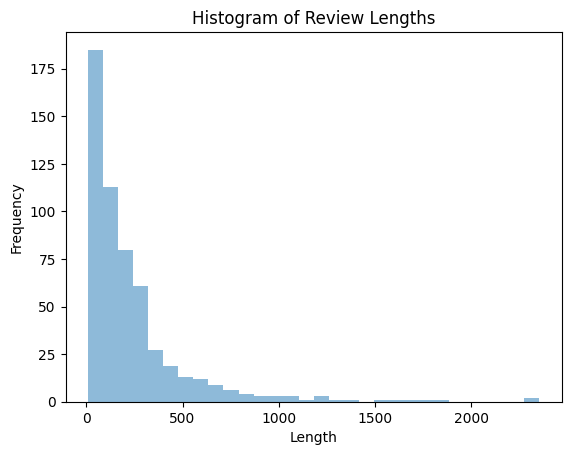

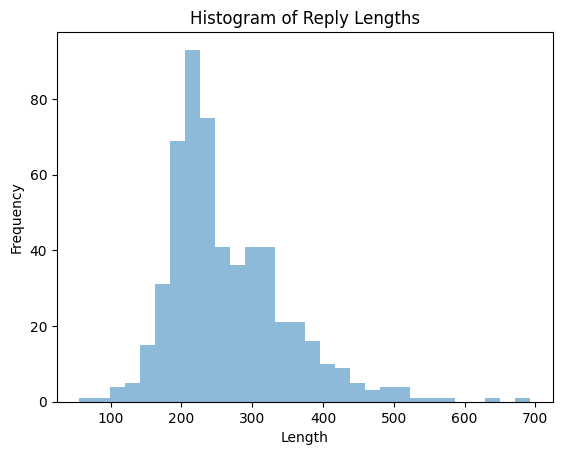

In [59]:
# Create a histogram of review lengths
plt.hist(text_gen_reviews.str.len(), bins=30, alpha=0.5)
plt.title('Histogram of Review Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

plt.hist(replies.str.len(), bins=30, alpha=0.5)
plt.title('Histogram of Reply Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

Vocabulary size reviews: 4741

Vocabulary size replies: 2263

og: 847
at: 532
en: 505
jeg: 402
i: 399
til: 349
var: 318
er: 309
på: 308
med: 306
ikke: 297
det: 275
af: 263
har: 248
for: 218
der: 217
god: 207
vi: 195
den: 186
bil: 175

 REPLIES: 
 

at: 1095
for: 1056
Vi: 919
din: 779
er: 758
du: 749
en: 667
Tak: 546
Hej: 518
[virksomhed]: 510
Mvh: 447
anmeldelse.: 432
har: 406
vi: 399
til: 391
glade: 383
god: 362
og: 355
med: 335
hos: 311


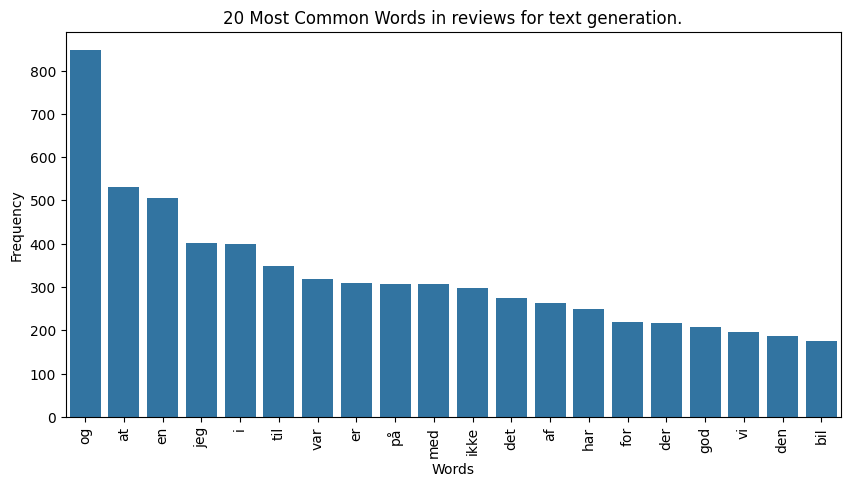

reply plot 
 


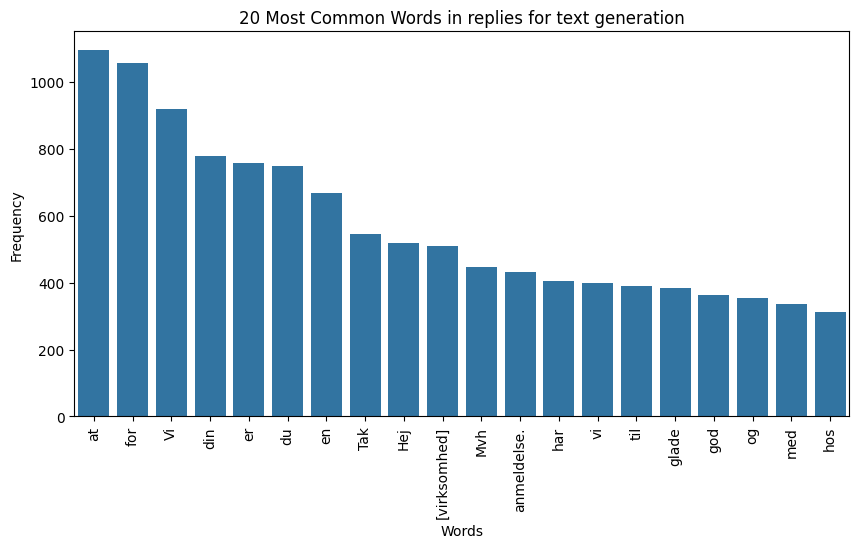

In [80]:
# Split the reviews into words
words_before_processing_gen = text_gen_reviews.str.split().sum()
words_before_processing_replies = replies.str.split().sum()

# Create a Counter object
counter_before_processing_gen = Counter(words_before_processing_gen)
counter_before_processing_replies = Counter(words_before_processing_replies)

# Print the size of the vocabulary
print(f"Vocabulary size reviews: {len(counter_before_processing_gen)}\n")
print(f"Vocabulary size replies: {len(counter_before_processing_replies)}\n")

# Get the 20 most common words
common_words_before_gen = counter_before_processing_gen.most_common(20)
common_words_before_replies = counter_before_processing_replies.most_common(20)

# Print the 20 most common words
for word, count in common_words_before_gen:
    print(f"{word}: {count}")

print("\n REPLIES: \n \n")
for word, count in common_words_before_replies:
    print(f"{word}: {count}")



# Plot the distribution of the 20 most common words before preprocessing
words, counts = zip(*common_words_before_gen)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title('20 Most Common Words in reviews for text generation.')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

print("reply plot \n ")

#plot the distribution of the 20 most common words in replies before preprocessing
words, counts = zip(*common_words_before_replies)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title('20 Most Common Words in replies for text generation')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


god: 294
bil: 270
servic: 256
virksomh: 231
bilen: 211
så: 180
fik: 132
ved: 129
oplevels: 116
kan: 111
super: 84
godt: 82
gang: 82
sælger: 81
rigtig: 71
tid: 67
få: 66
vore: 63
anbefal: 60
horsen: 59

 REPLIES: 
 

tak: 675
virksomh: 657
mvh: 549
hej: 518
anmeldels: 498
god: 430
rigtig: 388
glade: 387
håber: 355
høre: 331
dag: 325
oplevels: 320
gang: 253
vore: 227
bil: 205
kan: 179
hjælpe: 165
nye: 151
blevet: 138
så: 137
Vocabulary size: 2766
Vocabulary size: 1488


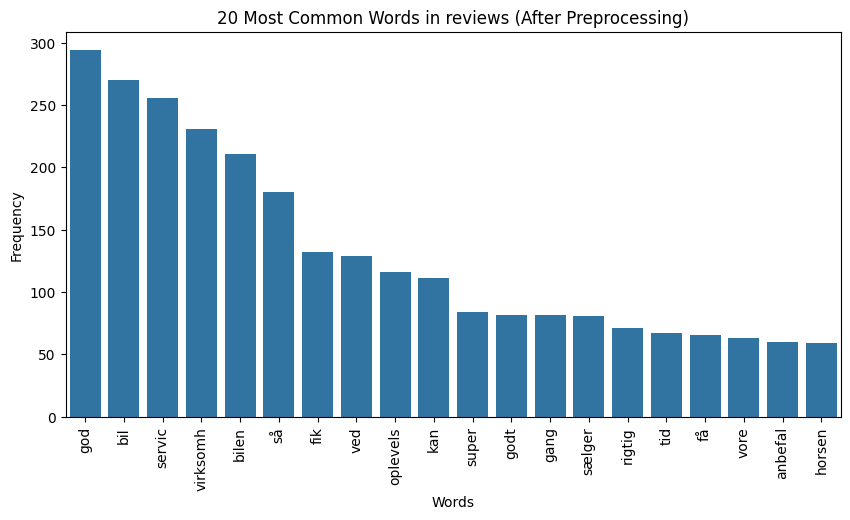

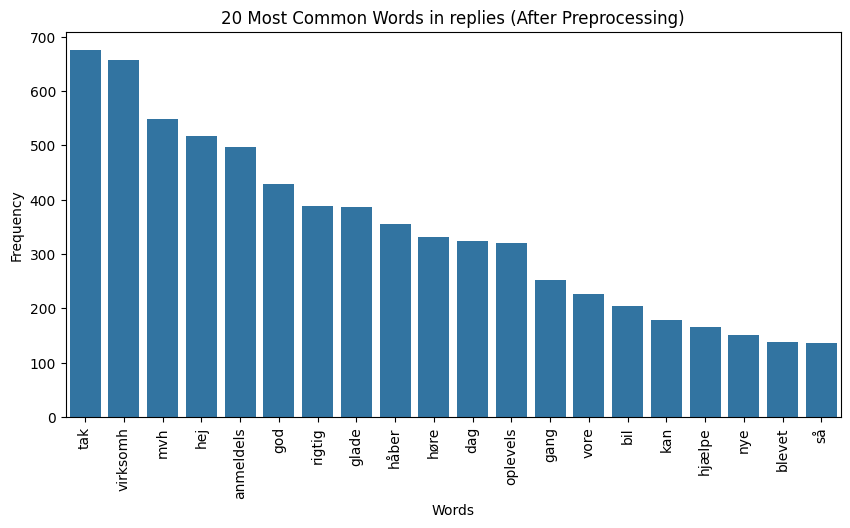

In [78]:
# Create a stemmer
stemmer = PorterStemmer()

# Get the list of stopwords
stop_words = set(stopwords.words('danish'))

# Tokenize, remove stopwords, and stem the words in the reviews
words_after_processing_gen = []
words_after_processing_replies = []
for i, reply in enumerate(replies):
    tokens_review = word_tokenize(text_gen_reviews[i].lower())
    tokens_replies = word_tokenize(reply.lower())
    filtered_tokens_review = [stemmer.stem(token) for token in tokens_review if token.isalpha() and token not in stop_words]
    filtered_tokens_replies = [stemmer.stem(token) for token in tokens_replies if token.isalpha() and token not in stop_words]
    words_after_processing_gen.extend(filtered_tokens_review)
    words_after_processing_replies.extend(filtered_tokens_replies)

# Create a Counter object
counter_after_gen = Counter(words_after_processing_gen)
counter_after_replies = Counter(words_after_processing_replies)

# Get the 20 most common words
common_words_after_gen = counter_after_gen.most_common(20)
common_words_after_replies = counter_after_replies.most_common(20)

# Print the 20 most common words
for word, count in common_words_after_gen:
    print(f"{word}: {count}")

print("\n REPLIES: \n \n")
for word, count in common_words_after_replies:
    print(f"{word}: {count}")


# Print the size of the vocabulary
print(f"Vocabulary size: {len(counter_after_gen)}")
print(f"Vocabulary size: {len(counter_after_replies)}")

words, counts = zip(*common_words_after_gen)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title('20 Most Common Words in reviews (After Preprocessing)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

words, counts = zip(*common_words_after_replies)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title('20 Most Common Words in replies (After Preprocessing)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()



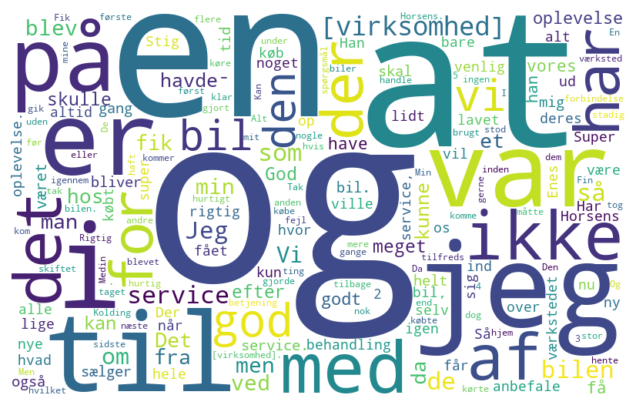

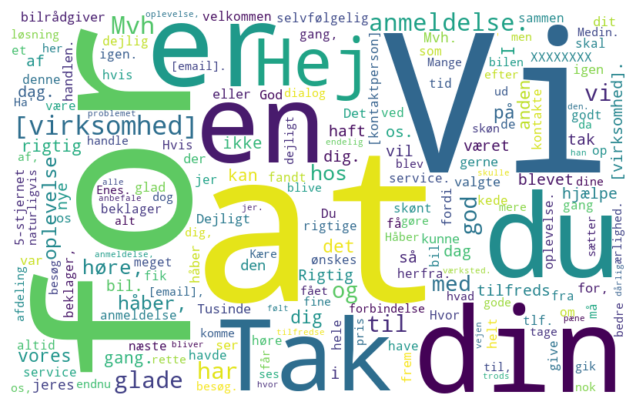

In [81]:
# Get the 100 most common words
common_words_gen = counter_before_processing_gen.most_common(200)
common_words_replies = counter_before_processing_replies.most_common(200)

# Create a word cloud
wordcloud_gen = WordCloud(width=800, height=500, background_color='white').generate_from_frequencies(dict(common_words_gen))
wordcloud_replies = WordCloud(width=800, height=500, background_color='white').generate_from_frequencies(dict(common_words_replies))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_gen, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_replies, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# Generate bigrams for text gen dataset
bigrams_gen = list(ngrams(words_after_processing_gen, 2))
bigram_counts_gen = Counter(bigrams_gen)
common_bigrams_gen = bigram_counts_gen.most_common(5)

# Generate trigrams
trigrams_gen = list(ngrams(words_after_processing_gen, 3))
trigram_counts_gen = Counter(trigrams_gen)
common_trigrams_gen = trigram_counts.most_common(5)

# Generate 4-grams
fourgrams_gen = list(ngrams(words_after_processing_gen, 4))
fourgram_counts_gen = Counter(fourgrams_gen)
common_fourgrams_gen = fourgram_counts.most_common(5)

# Print the most common n-grams
print("Most common bigrams:", common_bigrams_gen)
print("Most common trigrams:", common_trigrams_gen)
print("Most common 4-grams:", common_fourgrams_gen)

Most common bigrams: [(('god', 'servic'), 80), (('god', 'oplevels'), 48), (('rigtig', 'god'), 37), (('aunsbjerg', 'horsen'), 37), (('ved', 'aunsbjerg'), 30)]
Most common trigrams: [(('kan', 'varmt', 'anbefal'), 22), (('rigtig', 'god', 'servic'), 20), (('hele', 'vejen', 'igennem'), 19), (('kan', 'kun', 'anbefal'), 18), (('ved', 'aunsbjerg', 'horsen'), 15)]
Most common 4-grams: [(('servic', 'hele', 'vejen', 'igennem'), 6), (('kan', 'varmt', 'anbefal', 'aunsbjerg'), 6), (('fik', 'bilen', 'retur', 'km'), 5), (('bilen', 'retur', 'km', 'lyst'), 5), (('retur', 'km', 'lyst', 'motorlampen'), 5)]


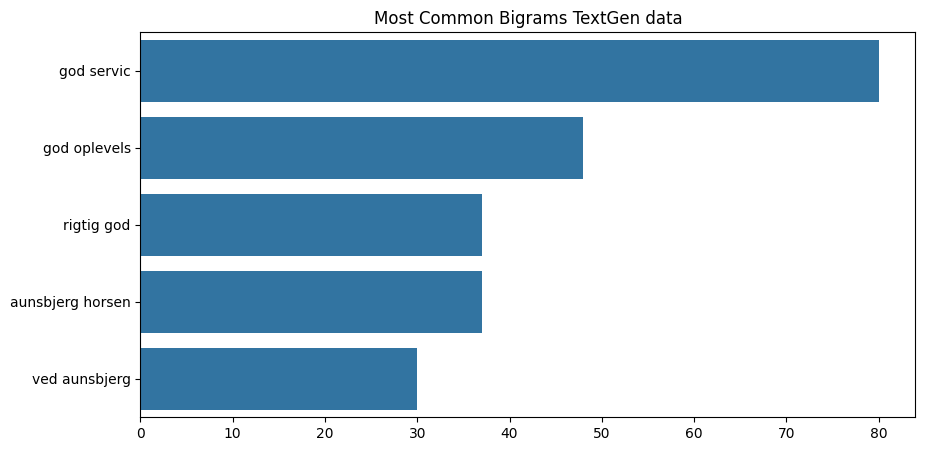

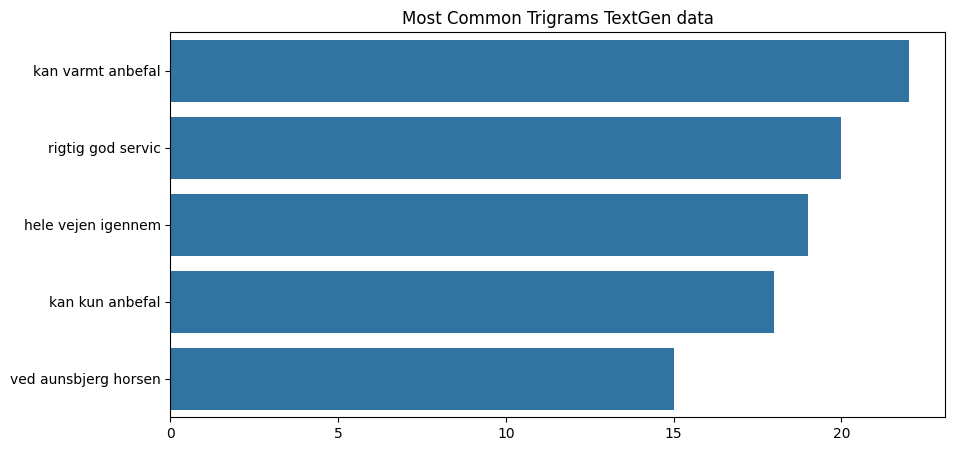

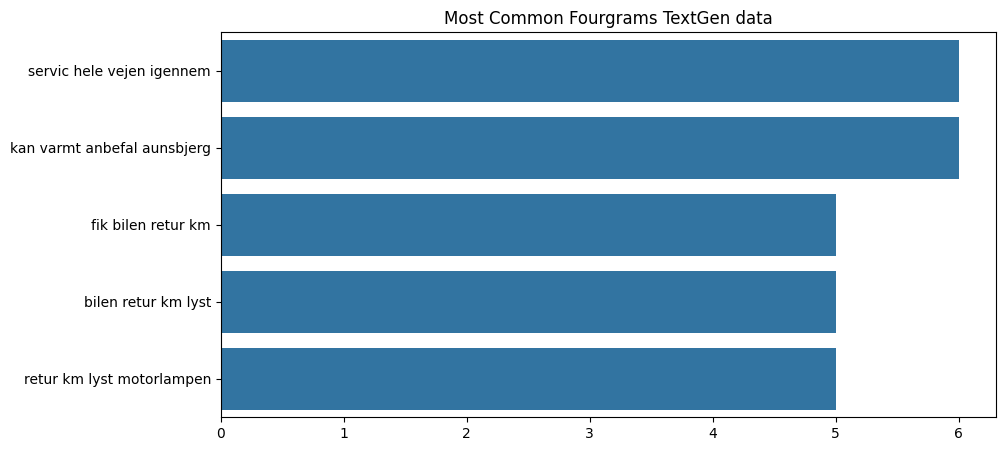

In [38]:
# Plot the most common bigrams, trigrams, and fourgrams
plot_most_common_ngrams(common_bigrams_gen, 'Most Common Bigrams TextGen data')
plot_most_common_ngrams(common_trigrams_gen, 'Most Common Trigrams TextGen data')
plot_most_common_ngrams(common_fourgrams_gen, 'Most Common Fourgrams TextGen data')